In [62]:
import pandas as pd

expo = pd.read_excel("ExpoArchive_cleaned.xlsx")
purchasing = pd.read_excel("PurchasingTool_cleaned.xlsx")
scorecard = pd.read_excel('Scorecard_cleaned.xlsx')

In [58]:
# aggregate expo

aggregate = pd.DataFrame()

aggregate['avg_late_need'] = expo.groupby('Vendor Code')['Late Need'].mean()
aggregate['avg_late_performance'] = expo.groupby('Vendor Code')['Late Performance'].mean()


aggregate['num_late_need'] = expo.groupby('Vendor Code')['Late Need'].apply(lambda x: x[x > 0].count())
aggregate['num_late_performance'] = expo.groupby('Vendor Code')['Late Performance'].apply(lambda x: x[x > 0].count())
aggregate['num_critical'] = expo.groupby('Vendor Code')['Late Performance'].apply(lambda x: x[x == True].count())
aggregate['num_orders'] = expo.groupby('Vendor Code')['Late Need'].count()
                                                                            

aggregate['%_late_need'] = aggregate['num_late_need'] / aggregate['num_orders']
aggregate['%_late_performance'] = aggregate['num_late_performance'] / aggregate['num_orders']
aggregate['%_critical'] = aggregate['num_critical'] / aggregate['num_orders']

aggregate = aggregate.drop(['num_late_performance'], axis=1)
aggregate = aggregate.drop(['num_late_need'], axis=1)
aggregate = aggregate.drop(['num_critical'], axis=1)


aggregate['Vendor Code'] = aggregate.index
aggregate.index = range(len(aggregate))

aggregate_expo = aggregate

In [60]:
# aggregate purchasing

aggregate = pd.DataFrame()
aggregate['avg_stdcost'] = purchasing.groupby('Vendor Code')['StdCost'].mean()
aggregate['avg_pocost'] = purchasing.groupby('Vendor Code')['PoCost'].mean()
aggregate['avg_qty'] = purchasing.groupby('Vendor Code')['Qty'].mean()
aggregate['avg_costsave'] = purchasing.groupby('Vendor Code')['InternalCostSavings'].mean()
aggregate['avg_spend'] = purchasing.groupby('Vendor Code')['Spend'].mean()
aggregate['avg_leadtime'] = purchasing.groupby('Vendor Code')['PurchLeadTime'].mean()


aggregate['num_orders'] = purchasing.groupby('Vendor Code')['Part'].count()

aggregate['num_a_priority'] = purchasing.groupby('Vendor Code')['ABC'].apply(lambda x: x[x == 'A'].count())
aggregate['num_b_priority'] = purchasing.groupby('Vendor Code')['ABC'].apply(lambda x: x[x == 'B'].count())
aggregate['num_c_priority'] = purchasing.groupby('Vendor Code')['ABC'].apply(lambda x: x[x == 'C'].count())

aggregate['%_a_priority'] = aggregate['num_a_priority'] / aggregate['num_orders']
aggregate['%_b_priority'] = aggregate['num_b_priority'] / aggregate['num_orders']
aggregate['%_c_priority'] = aggregate['num_c_priority'] / aggregate['num_orders']

aggregate = aggregate.drop('num_a_priority', axis = 1)
aggregate = aggregate.drop('num_b_priority', axis = 1)
aggregate = aggregate.drop('num_c_priority', axis = 1)


aggregate['Vendor Code'] = aggregate.index
aggregate.index = range(len(aggregate))

aggregate_purchasing = aggregate

aggregate_purchasing         
          

,avg_stdcost,avg_pocost,avg_qty,avg_costsave,avg_spend,avg_leadtime,num_orders,%_a_priority,%_b_priority,%_c_priority,Vendor Code
0,7.149703,7.050000,650.000000,-140.908705,4606.500000,120.000000,4,0.000000,0.000000,1.000000,83
1,0.790000,0.790000,3100.000000,0.000000,2449.000000,35.000000,1,0.000000,0.000000,1.000000,473
2,1.371250,1.369167,782.333333,2.003616,238.173333,17.083333,12,0.000000,0.000000,1.000000,612
3,509.442744,511.207407,25.696296,-583.903704,12730.237037,70.311111,135,0.696296,0.059259,0.244444,630
4,0.807333,1.055333,6986.666667,2955.464687,7200.600000,30.000000,15,0.933333,0.000000,0.066667,920
5,145.000000,145.000000,25.000000,0.000000,3625.000000,77.000000,2,1.000000,0.000000,0.000000,958
6,1.200000,1.200000,100.000000,0.000000,120.000000,30.000000,2,0.000000,0.000000,1.000000,993
7,4.160000,0.319000,0.000000,0.000000,0.000000,196.000000,2,0.000000,1.000000,0.000000,1027
8,38.570905,38.449774,87.454774,-183.908878,3223.768342,79.427136,398,0.984925,0.000000,0.015075,1056
9,176.253618,179.863636,14.863636,197.382349,3962.636364,119.000000,22,0.000000,0.363636,0.636364,1212


In [63]:
scorecard.head()

,Vendor Code,Period,QualityScore,QualityRating,DeliveryScore,DeliveryRating,TotalScore,TotalRating
0,49,201608,5,Gold,1,Red,3.0,Bronze
1,540,201608,5,Gold,5,Gold,5.0,Gold
2,612,201608,5,Gold,5,Gold,5.0,Gold
3,630,201608,5,Gold,5,Gold,5.0,Gold
4,920,201608,5,Gold,5,Gold,5.0,Gold


In [67]:
# aggregate scorecard

bad_periods = ['Current Fiscal Year', 'Previous Fiscal Year', 'Last 12 Complete Periods', 'Current Period']
bad_index = []
for i in range(len(scorecard)):
    if scorecard.iloc[i]['Period'] in bad_periods:
        bad_index = bad_index + [i]
        
scorecard = scorecard.drop(bad_index)

aggregate = pd.DataFrame()

aggregate['avg_quality'] = scorecard.groupby('Vendor Code')['QualityScore'].mean()
aggregate['avg_delivery'] = scorecard.groupby('Vendor Code')['DeliveryScore'].mean()

aggregate['Vendor Code'] = aggregate.index
aggregate.index = range(len(aggregate))

aggregate_scorecard = aggregate

aggregate_scorecard      

,avg_quality,avg_delivery,Vendor Code
0,5.000000,1.000000,49
1,5.000000,5.000000,83
2,5.000000,4.428571,361
3,5.000000,5.000000,473
4,5.000000,4.555556,540
5,5.000000,4.416667,612
6,4.956522,3.434783,630
7,5.000000,5.000000,761
8,5.000000,5.000000,858
9,5.000000,4.583333,920


In [68]:
print len(aggregate_purchasing)
print len(aggregate_expo)
print len(aggregate_scorecard)

498
371
914


In [69]:
# merge

join = aggregate_expo.merge(aggregate_purchasing, on = ['Vendor Code'], how = 'inner')
join = join.merge(aggregate_scorecard, on = ['Vendor Code'], how = 'inner')
print len(join)

join


342


,avg_late_need,avg_late_performance,num_orders_x,%_late_need,%_late_performance,%_critical,Vendor Code,avg_stdcost,avg_pocost,avg_qty,avg_costsave,avg_spend,avg_leadtime,num_orders_y,%_a_priority,%_b_priority,%_c_priority,avg_quality,avg_delivery
0,-10.500000,-186.500000,2,0.000000,0.000000,0.000000,83,7.149703,7.050000,650.000000,-140.908705,4606.500000,120.000000,4,0.000000,0.000000,1.000000,5.000000,5.000000
1,0.000000,0.000000,5,0.000000,0.000000,0.000000,612,1.371250,1.369167,782.333333,2.003616,238.173333,17.083333,12,0.000000,0.000000,1.000000,5.000000,4.416667
2,-8.737500,-9.150000,80,0.237500,0.300000,0.037500,630,509.442744,511.207407,25.696296,-583.903704,12730.237037,70.311111,135,0.696296,0.059259,0.244444,4.956522,3.434783
3,0.000000,1.428571,7,0.285714,0.428571,0.000000,920,0.807333,1.055333,6986.666667,2955.464687,7200.600000,30.000000,15,0.933333,0.000000,0.066667,5.000000,4.583333
4,2.000000,-4.700000,10,0.300000,0.000000,0.000000,1056,38.570905,38.449774,87.454774,-183.908878,3223.768342,79.427136,398,0.984925,0.000000,0.015075,5.000000,4.750000
5,-52.466667,-51.066667,15,0.200000,0.333333,0.066667,1212,176.253618,179.863636,14.863636,197.382349,3962.636364,119.000000,22,0.000000,0.363636,0.636364,5.000000,4.294118
6,658.180000,659.640000,50,0.320000,0.440000,0.020000,1250,127.023714,164.612917,45.500000,-38.327268,2605.765416,52.333333,24,0.000000,0.041667,0.958333,4.458333,2.250000
7,-0.279528,-0.330709,254,0.094488,0.098425,0.003937,1396,4.326191,5.468762,885.444015,553.962271,688.110348,44.146718,518,0.027027,0.081081,0.891892,5.000000,3.416667
8,-69.400000,1.200000,5,0.000000,0.200000,0.000000,1447,7.525217,7.525217,1200.000000,0.122054,9030.260870,42.130435,23,0.521739,0.478261,0.000000,5.000000,3.666667
9,15.395833,-7.291667,48,0.145833,0.104167,0.000000,1489,52.810900,52.775373,12.001570,22.086757,1171.903608,135.115626,5094,0.694543,0.249706,0.055752,4.458333,4.500000


In [71]:
join = join.drop('Vendor Code', axis = 1)

In [75]:
join

,avg_late_need,avg_late_performance,num_orders_x,%_late_need,%_late_performance,%_critical,avg_stdcost,avg_pocost,avg_qty,avg_costsave,avg_spend,avg_leadtime,num_orders_y,%_a_priority,%_b_priority,%_c_priority,avg_quality,avg_delivery
0,-10.500000,-186.500000,2,0.000000,0.000000,0.000000,7.149703,7.050000,650.000000,-140.908705,4606.500000,120.000000,4,0.000000,0.000000,1.000000,5.000000,5.000000
1,0.000000,0.000000,5,0.000000,0.000000,0.000000,1.371250,1.369167,782.333333,2.003616,238.173333,17.083333,12,0.000000,0.000000,1.000000,5.000000,4.416667
2,-8.737500,-9.150000,80,0.237500,0.300000,0.037500,509.442744,511.207407,25.696296,-583.903704,12730.237037,70.311111,135,0.696296,0.059259,0.244444,4.956522,3.434783
3,0.000000,1.428571,7,0.285714,0.428571,0.000000,0.807333,1.055333,6986.666667,2955.464687,7200.600000,30.000000,15,0.933333,0.000000,0.066667,5.000000,4.583333
4,2.000000,-4.700000,10,0.300000,0.000000,0.000000,38.570905,38.449774,87.454774,-183.908878,3223.768342,79.427136,398,0.984925,0.000000,0.015075,5.000000,4.750000
5,-52.466667,-51.066667,15,0.200000,0.333333,0.066667,176.253618,179.863636,14.863636,197.382349,3962.636364,119.000000,22,0.000000,0.363636,0.636364,5.000000,4.294118
6,658.180000,659.640000,50,0.320000,0.440000,0.020000,127.023714,164.612917,45.500000,-38.327268,2605.765416,52.333333,24,0.000000,0.041667,0.958333,4.458333,2.250000
7,-0.279528,-0.330709,254,0.094488,0.098425,0.003937,4.326191,5.468762,885.444015,553.962271,688.110348,44.146718,518,0.027027,0.081081,0.891892,5.000000,3.416667
8,-69.400000,1.200000,5,0.000000,0.200000,0.000000,7.525217,7.525217,1200.000000,0.122054,9030.260870,42.130435,23,0.521739,0.478261,0.000000,5.000000,3.666667
9,15.395833,-7.291667,48,0.145833,0.104167,0.000000,52.810900,52.775373,12.001570,22.086757,1171.903608,135.115626,5094,0.694543,0.249706,0.055752,4.458333,4.500000


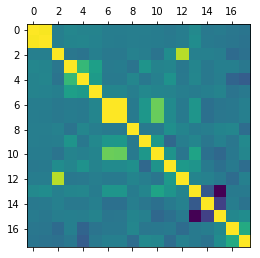

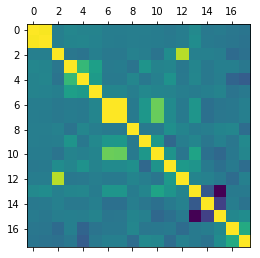

In [74]:
from sklearn.preprocessing import scale
join_scaled = scale(join)
join_scaled = pd.DataFrame(join_scaled)

import matplotlib.pyplot as plt

plt.matshow(join_scaled.corr())
plt.show()

In [76]:
join.to_excel('aggregate_join.xlsx', index= False)